In [214]:
# All the imports
import numpy as np
import pandas as pd
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import *
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import *
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from collections import *
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import *
from sklearn.calibration import CalibratedClassifierCV


# Data Loading

### Preview Data

In [215]:
print('features.txt\n',pd.read_table("features.txt", delim_whitespace=True, header=None).head())
print('activity_labels.txt\n',pd.read_table("activity_labels.txt", delim_whitespace=True, header=None).head())

features.txt
    0                  1
0  1  tBodyAcc-mean()-X
1  2  tBodyAcc-mean()-Y
2  3  tBodyAcc-mean()-Z
3  4   tBodyAcc-std()-X
4  5   tBodyAcc-std()-Y
activity_labels.txt
    0                   1
0  1             WALKING
1  2    WALKING_UPSTAIRS
2  3  WALKING_DOWNSTAIRS
3  4             SITTING
4  5            STANDING


### Headers and Label classes

In [216]:
headers = pd.read_table("features.txt", delim_whitespace=True, header=None, names=["id", "name"])
headers = [ f'{id}_{title}' for id, title in headers.values.tolist()]
print("Headers sample:", headers[:5])

df_activities = pd.read_table("activity_labels.txt", delim_whitespace=True, header=None, names=["id", "name"])
df_activities

Headers sample: ['1_tBodyAcc-mean()-X', '2_tBodyAcc-mean()-Y', '3_tBodyAcc-mean()-Z', '4_tBodyAcc-std()-X', '5_tBodyAcc-std()-Y']


,id,name
0,1,WALKING
1,2,WALKING_UPSTAIRS
2,3,WALKING_DOWNSTAIRS
3,4,SITTING
4,5,STANDING
5,6,LAYING


### Testing and Training DataFrames

In [217]:
X_train_all = pd.read_table("train/X_train.txt", delim_whitespace=True, header=None, names=headers)
print(X_train_all.shape)

y_train = pd.read_table("train/y_train.txt", delim_whitespace=True, header=None, names=['Label'])
print(y_train.shape)

X_test_all = pd.read_table("test/X_test.txt", delim_whitespace=True, header=None, names=headers)
print(X_test_all.shape)

y_test = pd.read_table("test/y_test.txt", delim_whitespace=True, header=None, names=['Label'])
print(y_test.shape)

print(set(np.ravel(y_train.values)))
X_train_all

(7352, 561)
(7352, 1)
(2947, 561)
(2947, 1)
{1, 2, 3, 4, 5, 6}


,1_tBodyAcc-mean()-X,2_tBodyAcc-mean()-Y,3_tBodyAcc-mean()-Z,4_tBodyAcc-std()-X,5_tBodyAcc-std()-Y,6_tBodyAcc-std()-Z,7_tBodyAcc-mad()-X,8_tBodyAcc-mad()-Y,9_tBodyAcc-mad()-Z,10_tBodyAcc-max()-X,...,552_fBodyBodyGyroJerkMag-meanFreq(),553_fBodyBodyGyroJerkMag-skewness(),554_fBodyBodyGyroJerkMag-kurtosis(),"555_angle(tBodyAccMean,gravity)","556_angle(tBodyAccJerkMean),gravityMean)","557_angle(tBodyGyroMean,gravityMean)","558_angle(tBodyGyroJerkMean,gravityMean)","559_angle(X,gravityMean)","560_angle(Y,gravityMean)","561_angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


---

# Generic Methods

In [218]:
def predict(X_train, y_train, X_test, model):
    model.fit(X_train, y_train)
    return model.predict(X_test)

def predictProb(X_train, y_train, X_test, model):
    model.fit(X_train, y_train)
    return model.predict_proba(X_test)

In [219]:
def accuracy(X_train, y_train, X_test, y_test, model_tuples):
    """
    model_tuples -> [('model description', model_object),...]
    """
    _dict = {desc: accuracy_score(y_test, predict(X_train, y_train, X_test, model)) for (desc, model) in model_tuples}
    df = pd.DataFrame()
    df['Model'], df['Accuracy'] = _dict.keys(), _dict.values()
    return df

def computeROCmatrics(y_test, y_predict_prob, positive_label=1):
    """
    return -> (fpr, tpr, AUC, thresholds)
    """
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob[:,positive_label-1], pos_label=positive_label)
    AUC = metrics.auc(fpr, tpr)
    return (fpr, tpr, AUC, thresholds)

In [220]:

def plotROC_AUC(ax, metrics_list):
    # Colormap
    cmp = plt.cm.get_cmap('hsv', len(metrics_list))
    
    # plot metrics
    for (clr, (cat, fpr, tpr, AUC)) in enumerate(metrics_list):        
        ax.plot(fpr, tpr, color=cmp(clr), lw=2, 
                 label='ROC - {} (area = {:0.2f})'.format(cat, AUC))

    # Random Guess line:
    ax.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

    # Defining The Range of X-Axis and Y-Axis:
    ax.axis(xmin=-0.005,xmax=1.005,ymin=0.0,ymax=1.005)

    # Labels, Legend:
    plt.xlabel('False Positive Rate', axes=ax)
    plt.ylabel('True Positive Rate', axes=ax)
    ax.legend(loc="lower right")

---

# Feature Selection

## Principal Component Analysis

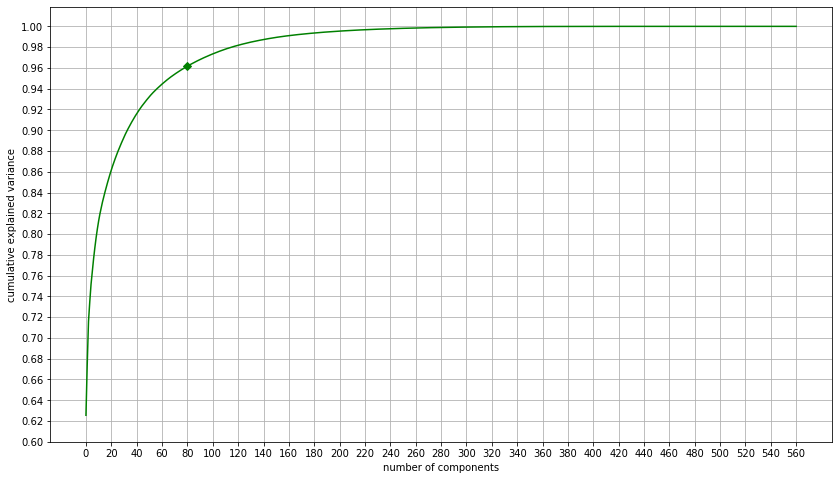

In [221]:
plt.figure(figsize=(14,8))
pca = PCA().fit(X_train_all)
plt.plot(np.cumsum(pca.explained_variance_ratio_), '-gD', markevery=[80])
plt.xticks(np.arange(0, 580, step=20))
plt.yticks(np.arange(0.6, 1.02, step=.02))
plt.grid()
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

### As we can see, we can easily retain 96% of variance using just about 80 features

In [222]:
# Using Variance Threshold
#sel = VarianceThreshold(threshold=(.7 * (1 - .7)))
#sel = sel.fit(X_train_all)

# Using a model fitted on training data and using its 'feature_importances_' attribute to select features
#lsvc = LinearSVC(C=0.005, penalty="l1", dual=False).fit(X_train_all, y_train.values.ravel())
#sel = SelectFromModel(lsvc, prefit=True)

# Using Principal component analysis (PCA)
variance = .96
sel = PCA(variance).fit(X_train_all)

print('Number of Features is reduced from {} to {} (i.e. {:0.2f}%) retaining {}% of variance in data'\
          .format(X_train_all.shape[1], sel.n_components_, sel.n_components_*100/X_train_all.shape[1], variance*100))
X_train = sel.transform(X_train_all)
X_test = sel.transform(X_test_all)

print(X_train.shape)
print(X_test.shape)


Number of Features is reduced from 561 to 79 (i.e. 14.08%) retaining 96.0% of variance in data
(7352, 79)
(2947, 79)


# Analysis

## List of models to be evaluated

In [223]:
cccv = lambda f: CalibratedClassifierCV(f, method='sigmoid')

model_list = [\
         ("KNeighborsClassifier",KNeighborsClassifier()),\
         ("DecisionTreeClassifier",DecisionTreeClassifier()),\
         ("LogisticRegression",LogisticRegression(tol=1e-6, max_iter=1000)),\
         ("Perceptron",cccv(Perceptron(tol=1e-6, random_state=0))),\
         ("PassiveAggressiveClassifier",cccv(PassiveAggressiveClassifier(max_iter=1000, random_state=0,tol=1e-6))),\
         ("SGDClassifier",SGDClassifier(loss='log')),\
         ("RandomForestClassifier", RandomForestClassifier(n_estimators = 19, bootstrap = True))
                                   ]

## Accuracy Comparison using accuracy_score

In [224]:
print("Model Accuracies for a given dataset:")
accuracies = accuracy(X_train, y_train.values.ravel(), X_test, y_test.values.ravel(), model_list)
display(accuracies.sort_values(by=['Accuracy'], ascending=False))

Model Accuracies for a given dataset:


,Model,Accuracy
2,LogisticRegression,0.944690
4,PassiveAggressiveClassifier,0.943672
3,Perceptron,0.939260
5,SGDClassifier,0.935867
0,KNeighborsClassifier,0.896844
6,RandomForestClassifier,0.878181
1,DecisionTreeClassifier,0.808958


## Compare the ROC and AUC metrics of models

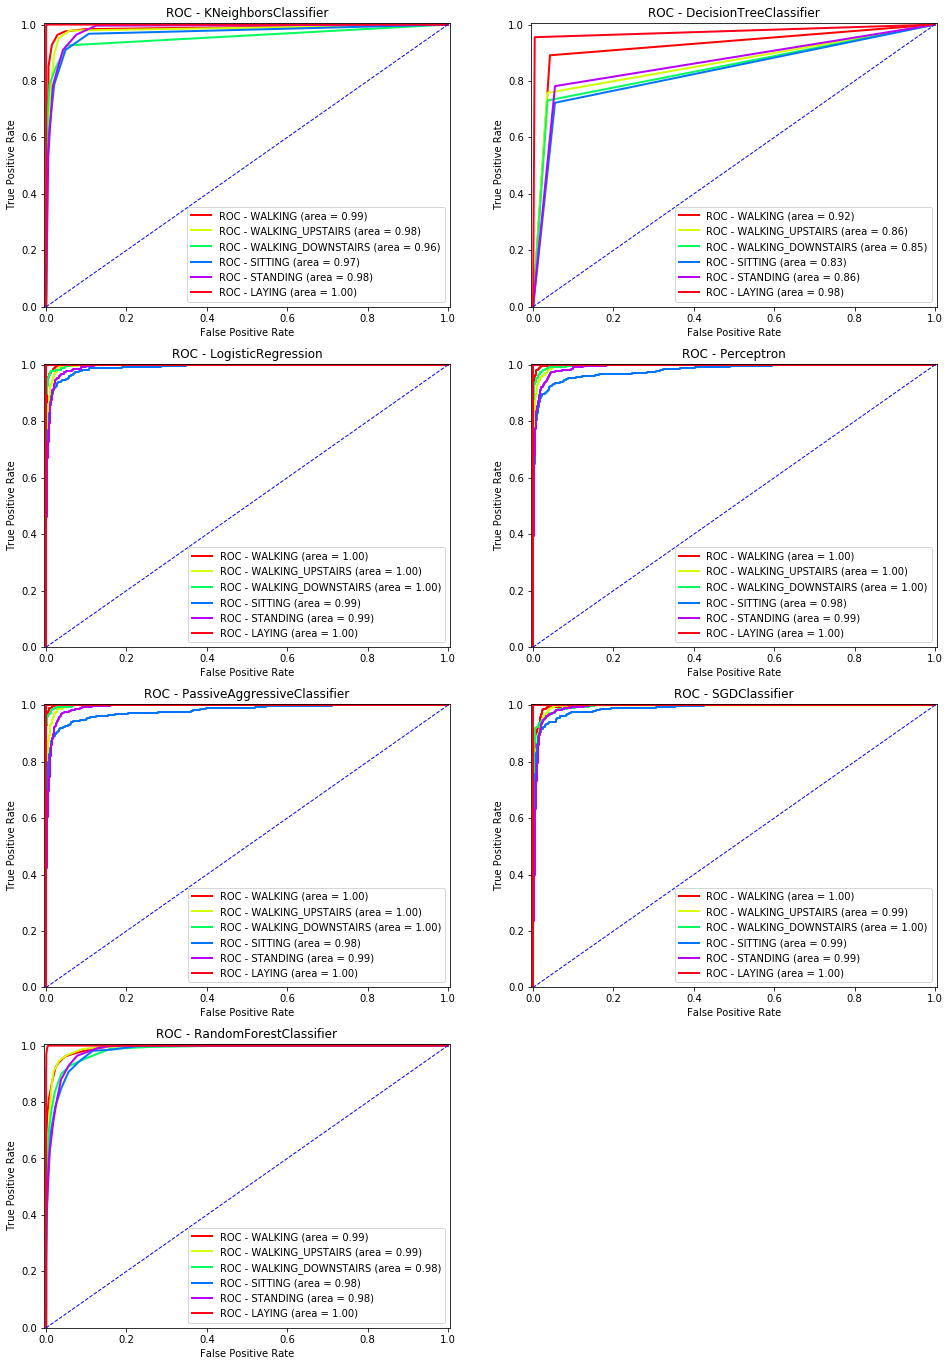

In [225]:
fig = plt.figure(figsize=(16,24))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

for _, (model_name, model_obj) in enumerate(model_list):
    ax = fig.add_subplot(4, 2, _+1)
    ax.set_title('ROC - {}'.format(model_name))
    y_predict_prob = predictProb(X_train, y_train.values.ravel(), X_test, model_obj)
    m = [(df_activities.at[label-1,'name'],) + computeROCmatrics(y_test, y_predict_prob, positive_label=label)[:-1] for label in [1,2,3,4,5,6]]
    plotROC_AUC(ax, m)


# Conclusion

### Activity can be predicted significantly faster with up to 94.47% of accuracy using just 14% of the features
### Among all 7 methods, Logistic Regressor performed the best
